# Prosper Loan data exploration
## by Osayande Ebowe

## Introduction
This project explores a dataset with loan data of approximately 113,937 loans, with 81 features in the dataset. The dataset being used for this project is the prosper loan Dataset, provided by the Udacity Nanodegree program. 


## Preliminary Wrangling


In [1]:
# import all packages necesssary for this exploratory analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
loan_dt=pd.read_csv('prosper_loan_data.csv')
loan_dt.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
loan_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [5]:
loan_dt.shape

(113937, 81)

In [6]:
loan_dt.dtypes

ListingKey                              object
ListingNumber                            int64
ListingCreationDate                     object
CreditGrade                             object
Term                                     int64
LoanStatus                              object
ClosedDate                              object
BorrowerAPR                            float64
BorrowerRate                           float64
LenderYield                            float64
EstimatedEffectiveYield                float64
EstimatedLoss                          float64
EstimatedReturn                        float64
ProsperRating (numeric)                float64
ProsperRating (Alpha)                   object
ProsperScore                           float64
ListingCategory (numeric)                int64
BorrowerState                           object
Occupation                              object
EmploymentStatus                        object
EmploymentStatusDuration               float64
IsBorrowerHom

In [7]:
loan_dt.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


### What is the structure of your dataset?

There are 113,937 loan records in this data and are organized into 81 distinct features. some of the variables are in numeric format, while the others are in object variables.  



### What is/are the main feature(s) of interest in your dataset?

The main features of interest in my dataset are investigations relating to borrowers and the loans collected.



### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

From the dataset, i expect; 

BorrowerRate

BorrowerState 

EmploymentStatus

Occupation

DebtToIncomeRatio 

IncomeRange

IncomeVerifiable 

IsBorrowerHomeowner

StatedMonthlyIncome

LoanStatus

LoanOriginalAmount

Term

CreditScoreRangeUpper

CreditScoreRangeLower


## Univariate Exploration

### wheat states are the top borrowers from?

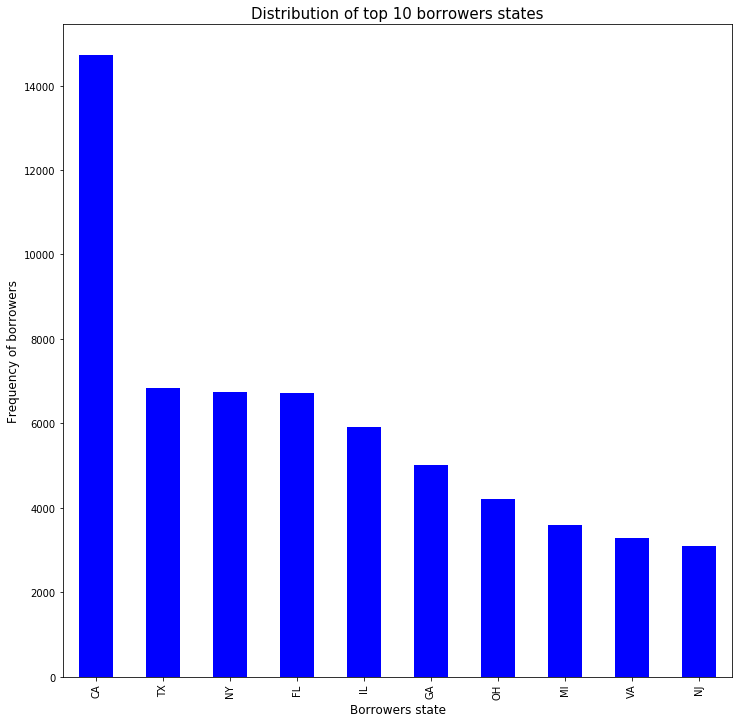

In [22]:
#looking at borrowers demohgraphy to know the top 10 borrowers state
top_10=loan_dt['BorrowerState'].value_counts().nlargest(10)
top_10.plot(kind='bar',color='b',figsize=([12,12]))
plt.title('Distribution of top 10 borrowers states',fontsize=(15))
plt.ylabel('Frequency of borrowers',fontsize=(12))
plt.xlabel('Borrowers state',fontsize=(12));

From the brachart we can see the see the top 10 borrowers states with california indicated as 'CA' holding the highest number of borrowers 

### what are the occupations of the borrowers?

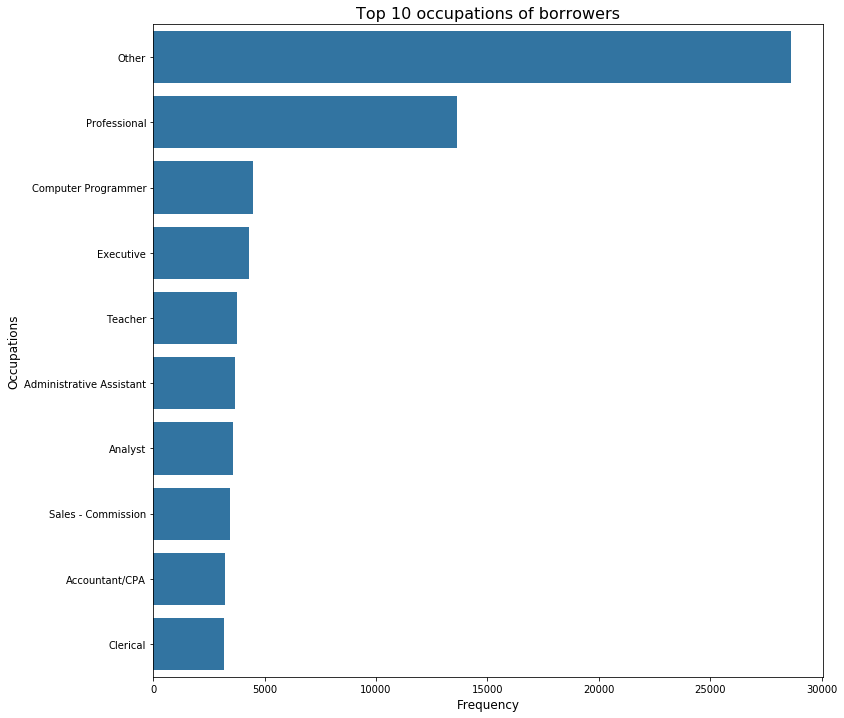

In [9]:
order=loan_dt['Occupation'].value_counts().iloc[:10].index
color=sb.color_palette()[0]
plt.figure(figsize=(12,12))
sb.countplot(data=loan_dt,y='Occupation',color=color,order=order)
plt.title('Top 10 occupations of borrowers',fontsize=16)
plt.xlabel('Frequency',fontsize=12)
plt.ylabel('Occupations',fontsize=12);

A lot of the borrowers are in occupations other than the top 9 

### what are the employment status of the borrowers?

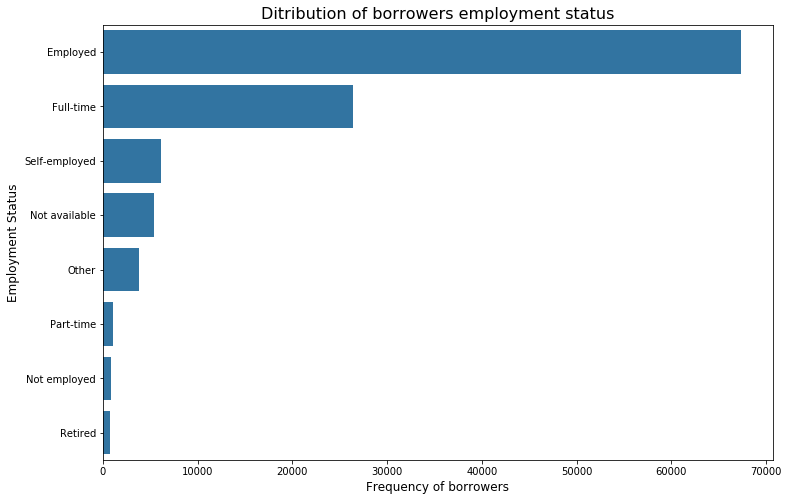

In [10]:
order=loan_dt['EmploymentStatus'].value_counts().index
color=sb.color_palette()[0]
plt.figure(figsize=[12,8])
sb.countplot(data=loan_dt,y='EmploymentStatus',color=color,order=order)
plt.title('Ditribution of borrowers employment status',fontsize=16)
plt.xlabel('Frequency of borrowers',fontsize=12)
plt.ylabel('Employment Status',fontsize=12);

From the visualization we can see that alot of borrowers are employed

### What is the loan status of borrowers?

In [11]:
order=loan_dt['LoanStatus'].value_counts()
order

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

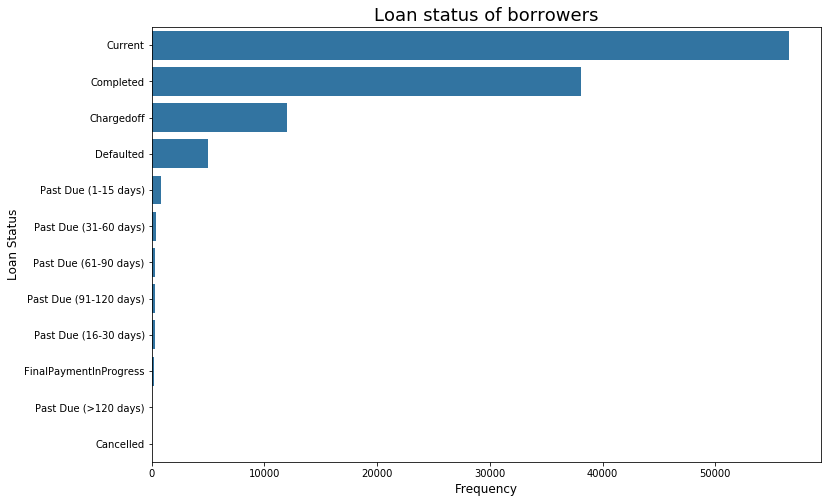

In [12]:
order=loan_dt['LoanStatus'].value_counts().index
plt.figure(figsize=[12,8])
color=sb.color_palette()[0]
sb.countplot(data=loan_dt,y='LoanStatus',order=order,color=color)
plt.title('Loan status of borrowers',fontsize=18)
plt.xlabel('Frequency',fontsize=12)
plt.ylabel('Loan Status',fontsize=12);

The largest number of borrowers are still servicing their loans, we can also see quite a large amount have also completed their loan payments

### what is the income range of borrowers?

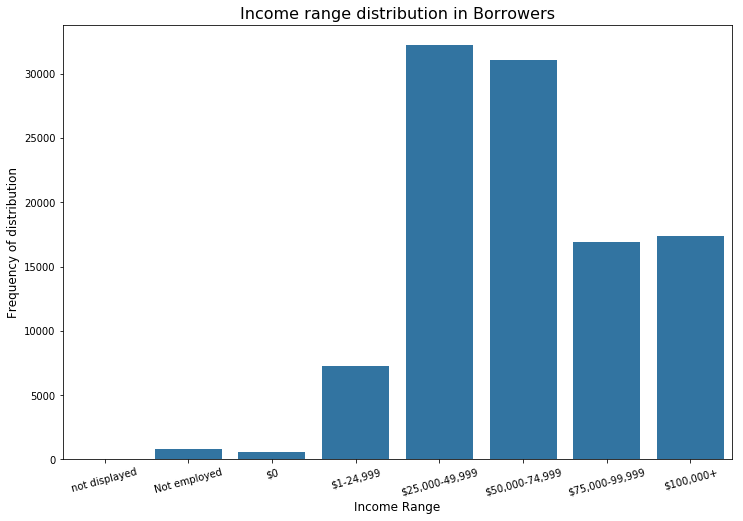

In [18]:
#A barchart depicting the distribution of borrrowers' income ranges
plt.figure(figsize = [12, 8])
color = sb.color_palette()[0]
order = ['not displayed', 'Not employed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999','$75,000-99,999', '$100,000+']
sb.countplot(data= loan_dt, x= 'IncomeRange', color = color, order = order)
plt.title('Income range distribution in Borrowers',fontsize=16)
plt.xticks(rotation=15)
plt.xlabel('Income Range', fontsize=12)
plt.ylabel('Frequency of distribution',fontsize=12,);

Most of the borrowers' income earnings are within the range of ($)25,000-74,999

### How many borrowers own homes?

In [25]:
is_home_owner=loan_dt['IsBorrowerHomeowner'].value_counts()
is_home_owner

True     57478
False    56459
Name: IsBorrowerHomeowner, dtype: int64

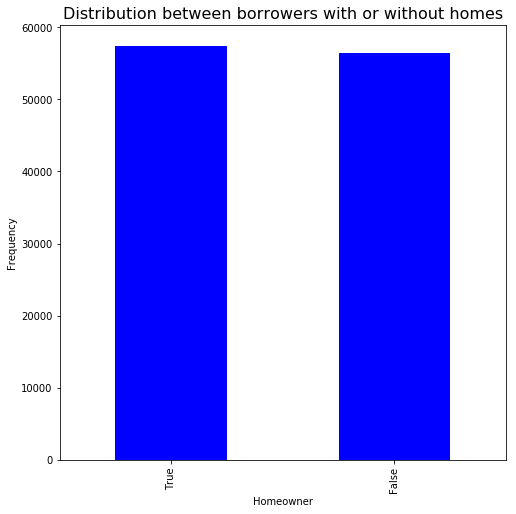

In [27]:
#a bar chart showing the distribution of home owners
is_home_owner=loan_dt['IsBorrowerHomeowner'].value_counts()
is_home_owner
plt.figure(figsize=[8,8])
is_home_owner.plot(kind='bar',x='IsBorrowerHomeowner',color='b')
plt.title('Distribution between borrowers with or without homes',fontsize=16)
plt.xlabel('Homeowner')
plt.ylabel('Frequency');

Number of borrowers with homes is slightly higher than borrowers without homes

### How much do the borrowers earn monthly?

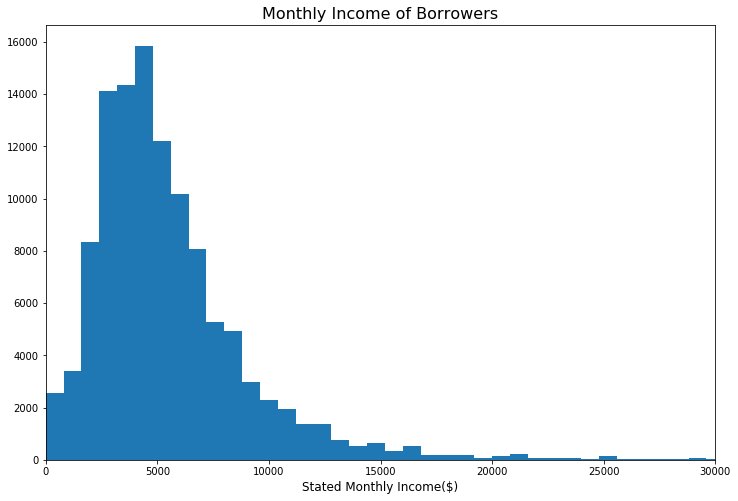

In [4]:
# A Histogram to show the distribution of Borrower's Stated Monthly Income
plt.figure(figsize = [12, 8])
bin= np.arange(0, loan_dt['StatedMonthlyIncome'].max()+800, 800)
plt.hist(data= loan_dt, x = 'StatedMonthlyIncome', bins= bin)
plt.xlim(0, 30000)
plt.title('Monthly Income of Borrowers',fontsize=16)
plt.xlabel('Stated Monthly Income($)',fontsize=12);

The distribution of monthly income is skewed to the right with most of the borrowers earning less than ($)10,000

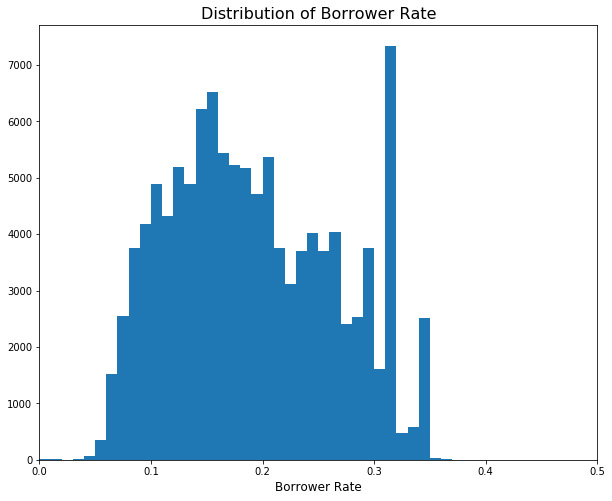

In [46]:
#A Histogram to show the distribution of the Borrower's Rate
plt.figure(figsize = [10, 8])
bin= np.arange(0, loan_dt['BorrowerRate'].max()+0.01, 0.01)
plt.hist(data= loan_dt, x = 'BorrowerRate', bins= bin)
plt.xlim(0, 0.5)
plt.title('Distribution of Borrower Rate',fontsize=16)
plt.xlabel('Borrower Rate',fontsize=12);

the distribution is skewed to the right

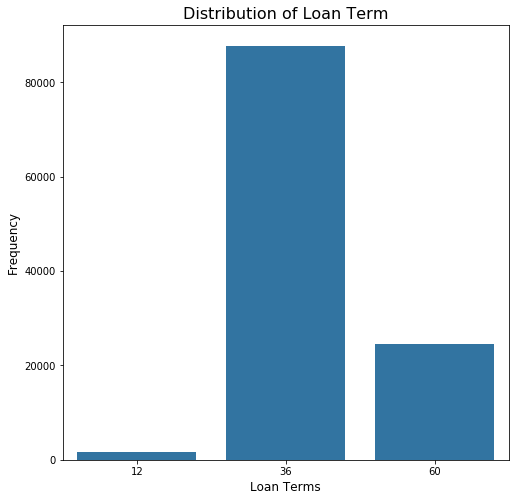

In [49]:
#creating bar chart to show the loan terms distribution
plt.figure(figsize = [8, 8])
color = sb.color_palette()[0]
order = [12, 36, 60]
sb.countplot(data= loan_dt, x= 'Term', color = color, order = order)
plt.title('Distribution of Loan Term',fontsize=16)
plt.xlabel('Loan Terms',fontsize=12)
plt.ylabel('Frequency',fontsize=12);
 

Most of the borrowers have a loan tern of 36 months

### How are the credit scores of borrowers distributed?

In [33]:
loan_dt['CreditScoreRangeLower'].isna().sum()

0

In [31]:
#dropping nans rows from CreditScoreRangeUpper and CreditScoreRangeLower
loan_dt['CreditScoreRangeUpper'].dropna(axis=0, inplace=True)
loan_dt['CreditScoreRangeLower'].dropna(axis=0, inplace=True)

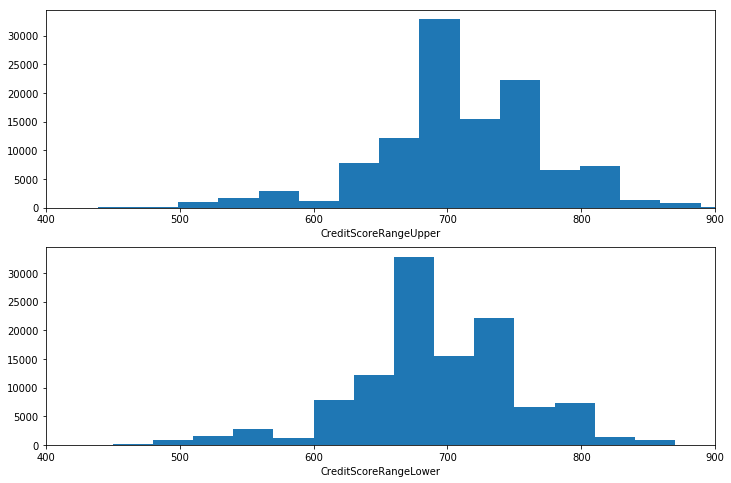

In [38]:
# using subplots to plot Histograms showing the distribution of the Credit Score Upper and Credit Score lower Range
fig, ax = plt.subplots(nrows=2, figsize = [12,8])
vars = ['CreditScoreRangeUpper', 'CreditScoreRangeLower']
for v in range(len(vars)):
    var = vars[v]
    bins = np.arange(min(loan_dt[var]), max(loan_dt[var])+30, 30)
    ax[v].hist(data = loan_dt, x = var, bins = bins)
    ax[v].set_xlabel('{}'.format(var))
    ax[v].set_xlim(400, 900)

plt.show()

The distribution in both ranges are similar with little disparity between them

In [41]:
loan_dt['DebtToIncomeRatio'].dropna(axis=0, inplace=True)

In [49]:
#loan_dt['DebtToIncomeRatio'].value_counts()

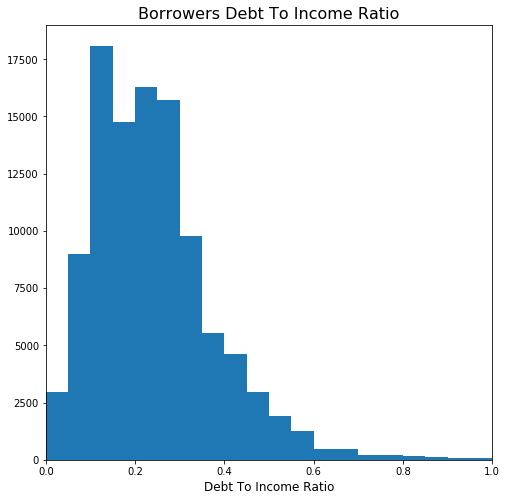

In [51]:
# creating an Histogram to show the distribution of the Borrower's DebtToIncomeRatio
plt.figure(figsize = [8, 8])
bin= np.arange(0, loan_dt['DebtToIncomeRatio'].max()+0.05, 0.05)
plt.hist(data= loan_dt, x = 'DebtToIncomeRatio', bins= bin)
plt.title('Borrowers Debt To Income Ratio',fontsize=16)
plt.xlabel('Debt To Income Ratio',fontsize=12)
plt.xlim(0, 1);

The Debt to income ratio histogram is skewed to the right 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
For my variable of interest, I looked at Borrower's state and discovered CA has the highest borrowers. I also explored borrower's employment status and discovered majority of them to be actively employed and fulltime workers. Then i moved to their occupation distribution and their income ranges and discovered they mostly ranged from 25,000-74,999 dollars. Their monthly income distribution is skewed to the right and are usually less than ($)30k. Their income ratio is right skewed. The credit score range lower and upper are 20 points different. I checked the loan term distribution and noticed most of the loans have a loan term of 36 months.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Of the features i investigated, i did not notice any unusual distribution and no further data wrangling was carried out.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Is there a correlation between BorrowerRate and LoanOriginalAmount?

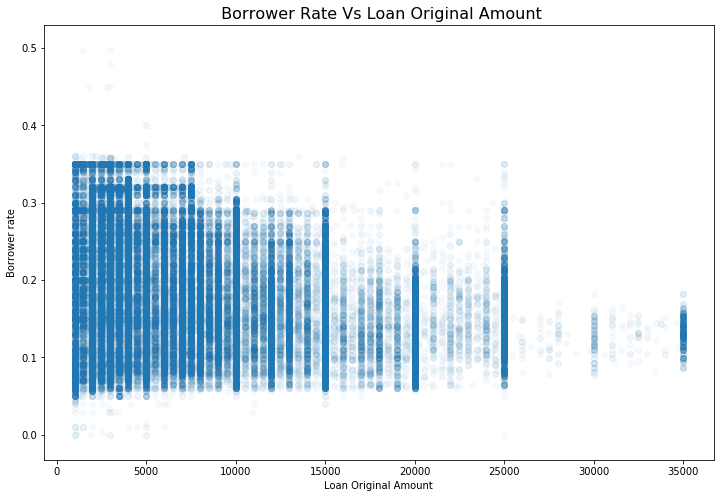

In [77]:
# lets look at the relationship between borrowerRate and loan original amount
plt.figure(figsize =[12,8])
plt.scatter(data=loan_dt,x = 'LoanOriginalAmount', y = 'BorrowerRate',alpha=0.03)
plt.title(' Borrower Rate Vs Loan Original Amount',fontsize=16)
plt.xlabel('Loan Original Amount')
plt.ylabel('Borrower rate');

The plot shows that loan original amount increases with a decrease in the range of borrower rate

### Is there a correlation between LoanOriginalAmount, StatedMonthlyIncome and DebtToIncomeRatio?

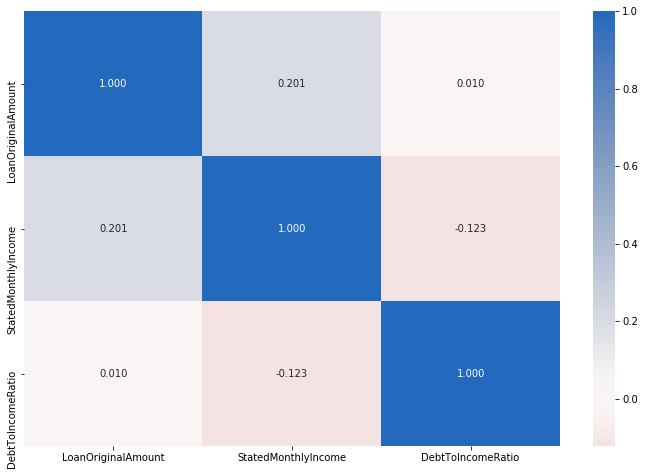

In [86]:
# showing correlation using a heatmap
num_vars = [ 'LoanOriginalAmount', 'StatedMonthlyIncome','DebtToIncomeRatio']
plt.figure(figsize = [12, 8])
sb.heatmap(loan_dt[num_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0);


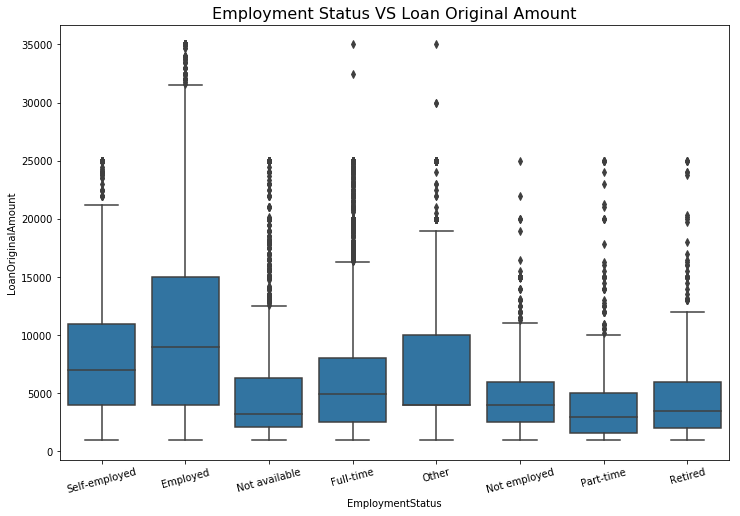

In [95]:
plt.figure(figsize=[12,8])
color=sb.color_palette()[0]
sb.boxplot(data=loan_dt,x='EmploymentStatus',y='LoanOriginalAmount',color=color)
plt.title('Employment Status VS Loan Original Amount',fontsize=16)
plt.xticks(rotation=15);

### Does verification of income status affect loan granted to borrowers?

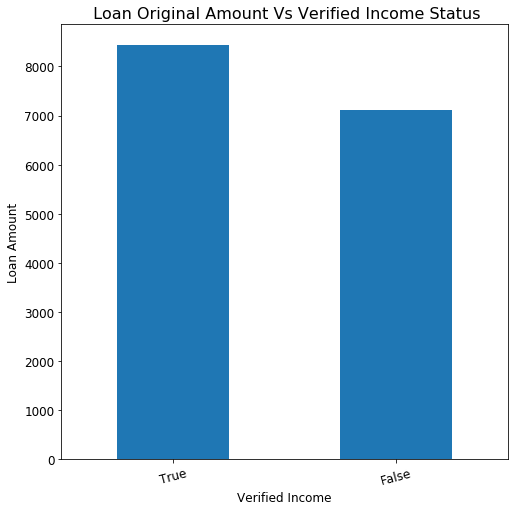

In [17]:
#Visualizing the relationship between loan original amount and their verifiable income status of borrowers 
verify= loan_dt.groupby('IncomeVerifiable')['LoanOriginalAmount'].mean().sort_values(ascending=False)
plt.figure(figsize = [8, 8])
color = sb.color_palette()[0]
verify.plot(kind='bar',fontsize=12,color=color)
plt.title(' Loan Original Amount Vs Verified Income Status',fontsize=16)
plt.xlabel('Verified Income',fontsize=12)
plt.xticks(rotation=15)
plt.ylabel ('Loan Amount',fontsize=12);

Borrowers with verified income have access to higher loan amounts compared to borrowers with unverified income

### How does income impact on borrowers owning homes?

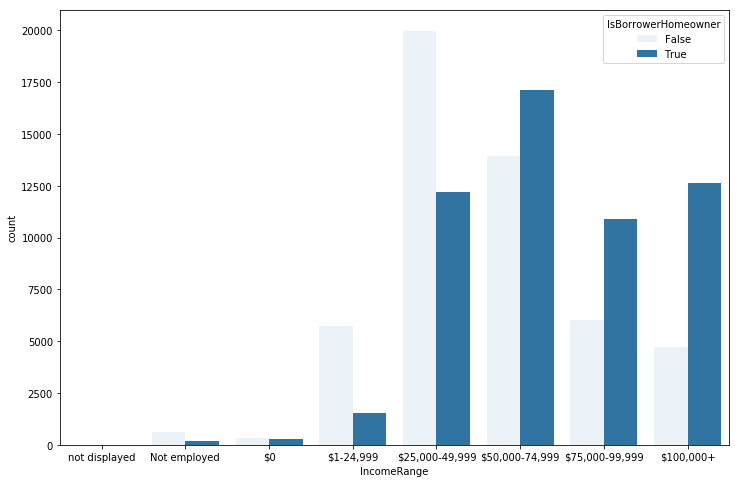

In [20]:
plt.figure(figsize = [12, 8])
color=sb.color_palette()[0]
order = ['not displayed', 'Not employed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999','$75,000-99,999', '$100,000+']
sb.countplot(data = loan_dt, x = 'IncomeRange', hue = 'IsBorrowerHomeowner', order=order,color=color);


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

From the relationships investigated BorrowersRate and LoanOriginalAmount showed a negative correlation, i.e lower borrower rate correlated with an increased loan amount. In another case, loan original amount showed a positive correlation with stated monthly income.Borowers who are actively employed and full time workers had access to larger amount of loans granted

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Most of the borrowers with income ranging from ($)50,000-100,000+ are majorly homeowners

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Does employment status have an affect the amount of loans granted?

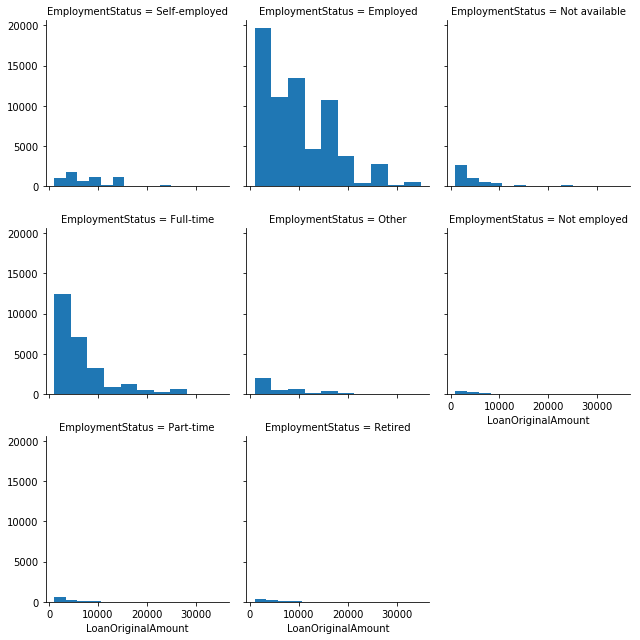

In [18]:
#A faceteted to show the distribution of employment status against original loans amount granted
g=sb.FacetGrid(data=loan_dt,col='EmploymentStatus',col_wrap=3)
g.map(plt.hist,'LoanOriginalAmount');

Borrowers who are actively employed have the most loan amounts granted

### Does verified income affect the relationship between loan original amount and income range?

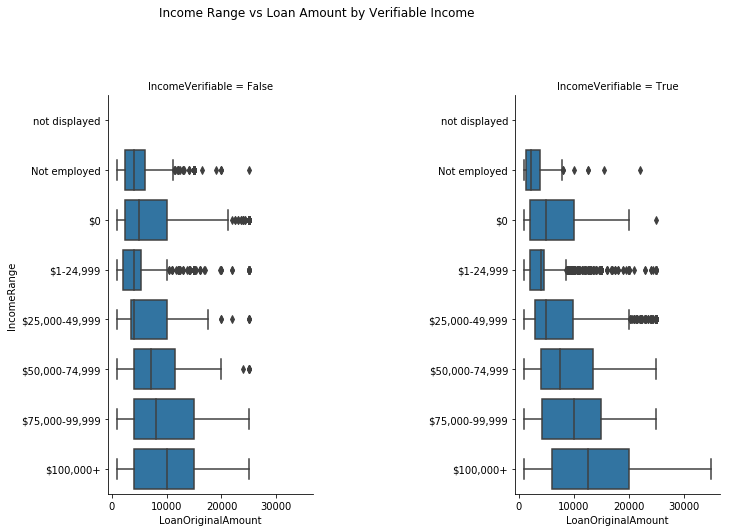

In [46]:
order = ['not displayed', 'Not employed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999','$75,000-99,999', '$100,000+']
g= sb.FacetGrid(data= loan_dt, col = 'IncomeVerifiable')
g.map(sb.boxplot, 'LoanOriginalAmount', 'IncomeRange', order = order)
plt.suptitle('Income Range vs Loan Amount by Verifiable Income', y = 1.04)
g.fig.set_size_inches(12,8);

Borrowers earning ($)100,000+ with verified have access to larger loan original amount when compared to borrowers with unverifed income.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

Borrowers who are actively employed have the largest loan amounts granted

### Were there any interesting or surprising interactions between features?

Borrowers earning 100,000+ and have their income verified tend to get larger loan original amount than those who earn 100,000+ but their income are not verified.

## Conclusions
For this exploratory analysis, my main interest was to analyze the borrowers information for relationship insights with the loans they took.

Exploring the distribution of single variables of interest in my dataset, the first insight information discovered was that california referenced as CA State had the highest count of borrowers. I also investigated the loan status of borrowers and discovered that most of the borrowers were current with their loans and have not defaulted in payments. Going further and obeserving Borrower's employment status,majority of the borrowers are either actively employed. Investigating further into their source of income, the visualized data showed that borrowers income mostly ranges from 25,000-74,999 and their monthly income distribution is skewed to the right with incomes usually less than 30k. Their income ratio is right skewed as well. Looking at the loan terms, most of the loans have a loan term of 36 months.
I then moved to investigate possible relationships between two variables in the dataset using multivariate plots, I discovered that the borrower interest Rate is negatively correlated with the loan original amount. It also shows that at different size of the loan amount, the Rate has a large range, but the range of interest Rate decreases with increasing loan amount. Looking at the monthly income of borrowers, I discovered that the loan original amount is positively correlated with the stated monthly income. Also, Borrowers with verified income tend to have access to higher loan amount than borrowers without verified income. Borrowers with income ranging from ($)50,000-100,000+ are majorly homeowners. Borrowers who are employed and fulltime on average take out larger loans than other groups.

On further ivestigation using multiple multivariate variables from the dataset, i checked for possible effect verified income has on the relationship between loan original amount and income range,discovering that People who earn ($)100,000+ and have verified their income tend to get larger loan original to their counterparts who earn same income income but are not verified.

Stackoverflow and the lectures on the various types of plots in the udacity lecture were reference points for completing this exploratory analysis.
